First few rows of the dataset:
         Date      Open      High       Low     Close     Volume
0  05/08/2025  1,404.95  1,420.50  1,397.05  1,404.85    573,809
1  05/07/2025  1,412.05  1,424.90  1,402.15  1,406.00    262,093
2  05/06/2025  1,432.00  1,432.00  1,410.35  1,420.55    311,563
3  05/05/2025  1,427.00  1,439.75  1,427.00  1,431.10    428,786
4  05/02/2025  1,408.40  1,426.00  1,408.40  1,421.95  3,746,656

Dataset contains 19 rows and 2 columns

Missing values in each column:
Date     0
Close    0
dtype: int64


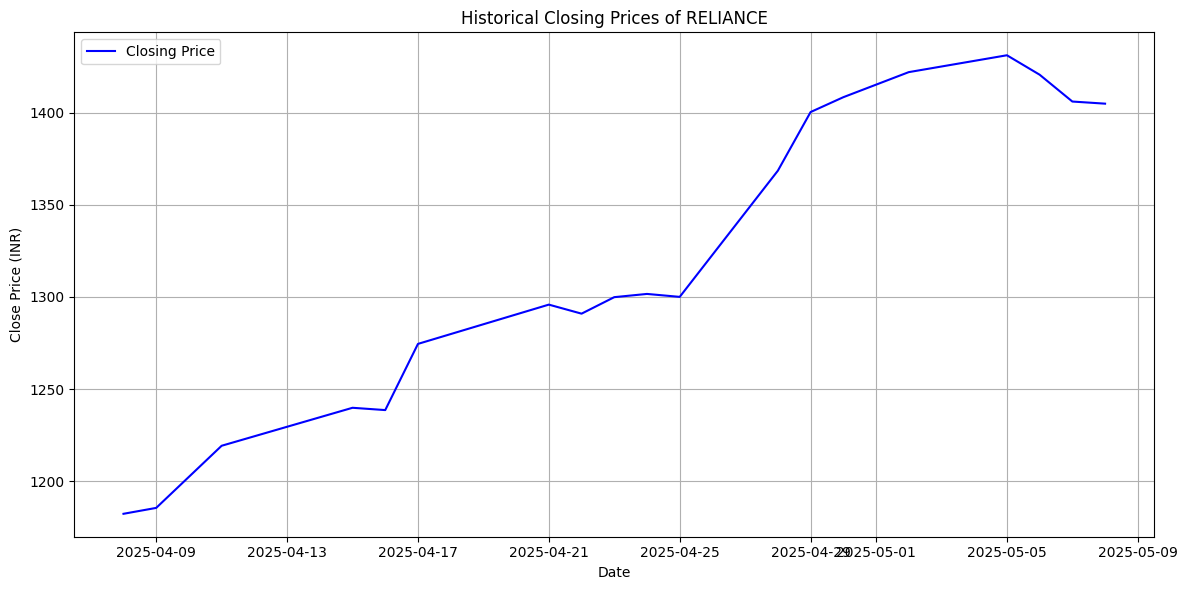


--- Linear Regression ---
Linear Regression Mean Squared Error on Test Set: 122.35

Linear Regression Predicted stock prices for the next 7 days:
Date        | Predicted Close Price (INR)
------------|-----------------------------
2025-05-09 | 1448.14
2025-05-10 | 1456.74
2025-05-11 | 1465.34
2025-05-12 | 1473.94
2025-05-13 | 1482.54
2025-05-14 | 1491.14
2025-05-15 | 1499.74

--- Support Vector Regression (SVR) ---
SVR Mean Squared Error on Test Set: 1736.19

SVR Predicted stock prices for the next 7 days:
Date        | Predicted Close Price (INR)
------------|-----------------------------
2025-05-09 | 1387.58
2025-05-10 | 1376.37
2025-05-11 | 1365.65
2025-05-12 | 1355.86
2025-05-13 | 1347.28
2025-05-14 | 1340.03
2025-05-15 | 1334.13

--- Comparison of Predictions ---
Date        | Linear Reg (INR) | SVR (INR)
------------|------------------|----------
2025-05-09 | 1448.14   | 1387.58
2025-05-10 | 1456.74   | 1376.37
2025-05-11 | 1465.34   | 1365.65
2025-05-12 | 1473.94   | 1355.86
20

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('/content/Reliance_Stock.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Parse date and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')

# Remove commas and convert Close column to float
df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Drop missing values
df = df[['Date', 'Close']].dropna()

# Show dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Plot historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.title('Historical Closing Prices of RELIANCE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert date to ordinal
df['DateOrdinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Prepare data for regression
X = df['DateOrdinal'].values.reshape(-1, 1)
y = df['Close'].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
print("\n--- Linear Regression ---")
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions_test = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions_test)
print(f"Linear Regression Mean Squared Error on Test Set: {linear_mse:.2f}")

# Predict the next 7 days using Linear Regression
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 8)]
future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
linear_future_predictions = linear_model.predict(future_ordinals)

print("\nLinear Regression Predicted stock prices for the next 7 days:")
print("Date        | Predicted Close Price (INR)")
print("------------|-----------------------------")
for date, price in zip(future_dates, linear_future_predictions):
    print(f"{date.strftime('%Y-%m-%d')} | {price:.2f}")

# --- Support Vector Regression (SVR) ---
print("\n--- Support Vector Regression (SVR) ---")
# Feature Scaling for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Train SVR model
svr_model = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', 'sigmoid'
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
svr_predictions_scaled_test = svr_model.predict(X_test_scaled)
svr_predictions_test = scaler_y.inverse_transform(svr_predictions_scaled_test.reshape(-1, 1)).flatten()
svr_mse = mean_squared_error(y_test, svr_predictions_test)
print(f"SVR Mean Squared Error on Test Set: {svr_mse:.2f}")

# Predict the next 7 days using SVR
future_ordinals_scaled = scaler_X.transform(future_ordinals)
svr_future_predictions_scaled = svr_model.predict(future_ordinals_scaled)
svr_future_predictions = scaler_y.inverse_transform(svr_future_predictions_scaled.reshape(-1, 1)).flatten()

print("\nSVR Predicted stock prices for the next 7 days:")
print("Date        | Predicted Close Price (INR)")
print("------------|-----------------------------")
for date, price in zip(future_dates, svr_future_predictions):
    print(f"{date.strftime('%Y-%m-%d')} | {price:.2f}")

# --- Compare Predictions ---
print("\n--- Comparison of Predictions ---")
print("Date        | Linear Reg (INR) | SVR (INR)")
print("------------|------------------|----------")
for i in range(len(future_dates)):
  print(f"{future_dates[i].strftime('%Y-%m-%d')} | {linear_future_predictions[i]:.2f}   | {svr_future_predictions[i]:.2f}")


First few rows of the dataset:
         Date      Open      High       Low     Close     Volume
0  05/08/2025  1,404.95  1,420.50  1,397.05  1,404.85    573,809
1  05/07/2025  1,412.05  1,424.90  1,402.15  1,406.00    262,093
2  05/06/2025  1,432.00  1,432.00  1,410.35  1,420.55    311,563
3  05/05/2025  1,427.00  1,439.75  1,427.00  1,431.10    428,786
4  05/02/2025  1,408.40  1,426.00  1,408.40  1,421.95  3,746,656

Dataset contains 19 rows and 2 columns

Missing values in each column:
Date     0
Close    0
dtype: int64


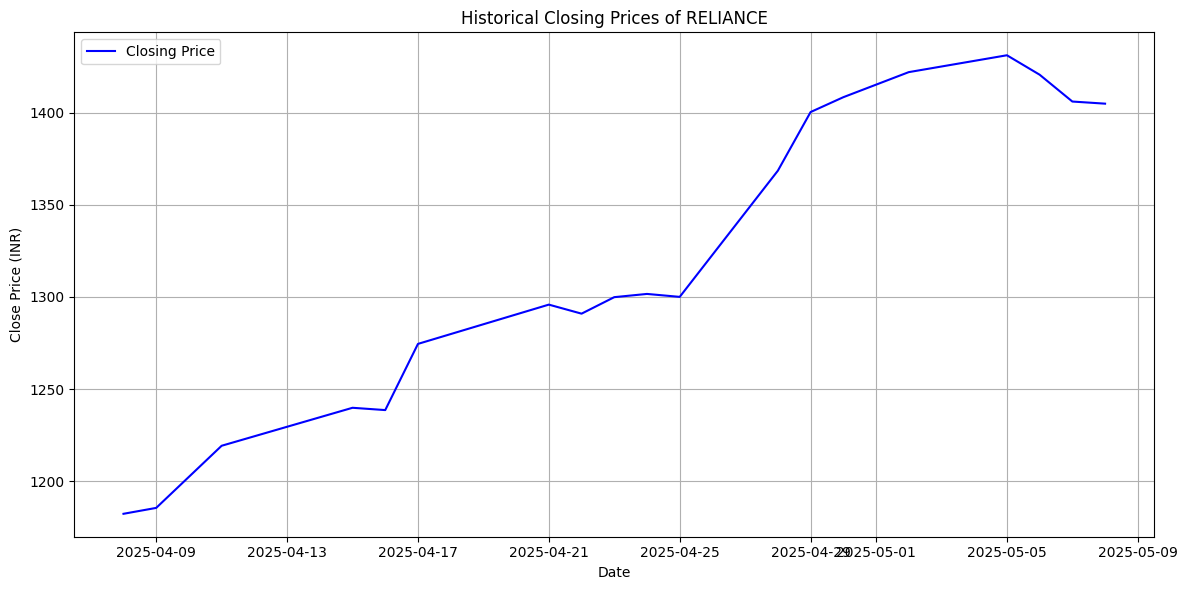


--- Linear Regression ---
Linear Regression Mean Squared Error on Test Set: 122.35

Linear Regression Predicted stock prices for the next 7 days:
Date        | Predicted Close Price (INR)
------------|-----------------------------
2025-05-09 | 1448.14
2025-05-10 | 1456.74
2025-05-11 | 1465.34
2025-05-12 | 1473.94
2025-05-13 | 1482.54
2025-05-14 | 1491.14
2025-05-15 | 1499.74

--- Support Vector Regression (SVR) ---
SVR Mean Squared Error on Test Set: 1736.19

SVR Predicted stock prices for the next 7 days:
Date        | Predicted Close Price (INR)
------------|-----------------------------
2025-05-09 | 1387.58
2025-05-10 | 1376.37
2025-05-11 | 1365.65
2025-05-12 | 1355.86
2025-05-13 | 1347.28
2025-05-14 | 1340.03
2025-05-15 | 1334.13

--- Random Forest Regressor ---
Random Forest Mean Squared Error on Test Set: 1198.67

Random Forest Predicted stock prices for the next 7 days:
Date        | Predicted Close Price (INR)
------------|-----------------------------
2025-05-09 | 1407.03
202

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('/content/Reliance_Stock.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Parse date and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')

# Remove commas and convert Close column to float
df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Drop missing values
df = df[['Date', 'Close']].dropna()

# Show dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Plot historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.title('Historical Closing Prices of RELIANCE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert date to ordinal
df['DateOrdinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Prepare data for regression
X = df['DateOrdinal'].values.reshape(-1, 1)
y = df['Close'].values

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
print("\n--- Linear Regression ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions_test = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions_test)
print(f"Linear Regression Mean Squared Error on Test Set: {linear_mse:.2f}")

# Predict next 7 days
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 8)]
future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
linear_future_predictions = linear_model.predict(future_ordinals)

print("\nLinear Regression Predicted stock prices for the next 7 days:")
print("Date        | Predicted Close Price (INR)")
print("------------|-----------------------------")
for date, price in zip(future_dates, linear_future_predictions):
    print(f"{date.strftime('%Y-%m-%d')} | {price:.2f}")

# --- Support Vector Regression (SVR) ---
print("\n--- Support Vector Regression (SVR) ---")
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)
svr_predictions_scaled_test = svr_model.predict(X_test_scaled)
svr_predictions_test = scaler_y.inverse_transform(svr_predictions_scaled_test.reshape(-1, 1)).flatten()
svr_mse = mean_squared_error(y_test, svr_predictions_test)
print(f"SVR Mean Squared Error on Test Set: {svr_mse:.2f}")

future_ordinals_scaled = scaler_X.transform(future_ordinals)
svr_future_predictions_scaled = svr_model.predict(future_ordinals_scaled)
svr_future_predictions = scaler_y.inverse_transform(svr_future_predictions_scaled.reshape(-1, 1)).flatten()

print("\nSVR Predicted stock prices for the next 7 days:")
print("Date        | Predicted Close Price (INR)")
print("------------|-----------------------------")
for date, price in zip(future_dates, svr_future_predictions):
    print(f"{date.strftime('%Y-%m-%d')} | {price:.2f}")

# --- Random Forest Regressor ---
print("\n--- Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions_test = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions_test)
print(f"Random Forest Mean Squared Error on Test Set: {rf_mse:.2f}")

rf_future_predictions = rf_model.predict(future_ordinals)

print("\nRandom Forest Predicted stock prices for the next 7 days:")
print("Date        | Predicted Close Price (INR)")
print("------------|-----------------------------")
for date, price in zip(future_dates, rf_future_predictions):
    print(f"{date.strftime('%Y-%m-%d')} | {price:.2f}")

# --- Comparison of Predictions ---
print("\n--- Comparison of Predictions ---")
print("Date        | Linear Reg (INR) | SVR (INR) | Random Forest (INR)")
print("------------|------------------|-----------|----------------------")
for i in range(len(future_dates)):
    print(f"{future_dates[i].strftime('%Y-%m-%d')} | {linear_future_predictions[i]:.2f}         | "
          f"{svr_future_predictions[i]:.2f}     | {rf_future_predictions[i]:.2f}")
